In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
plt.rcParams['axes.unicode_minus'] = False 


In [16]:

path = '../dataset/raw/ml-1m_v2/'


try:
    movies_df = pd.read_csv(path + 'movies.csv')
    ratings_df = pd.read_csv(path + 'ratings.csv')
    print("데이터 파일 불러오기 성공!")
except FileNotFoundError:
    print(f"Error: '{path}' 경로에 데이터 파일이 없습니다. 경로를 확인해주세요.")

데이터 파일 불러오기 성공!


In [17]:
# movie data

print(len(movies_df))
movies_df.head()

3883


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
movies_df.describe()

,movieId
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [19]:
# rating data

print(len(ratings_df))
ratings_df.head()

1000209


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
ratings_df.describe

<bound method NDFrame.describe of          userId  movieId  rating  timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]>

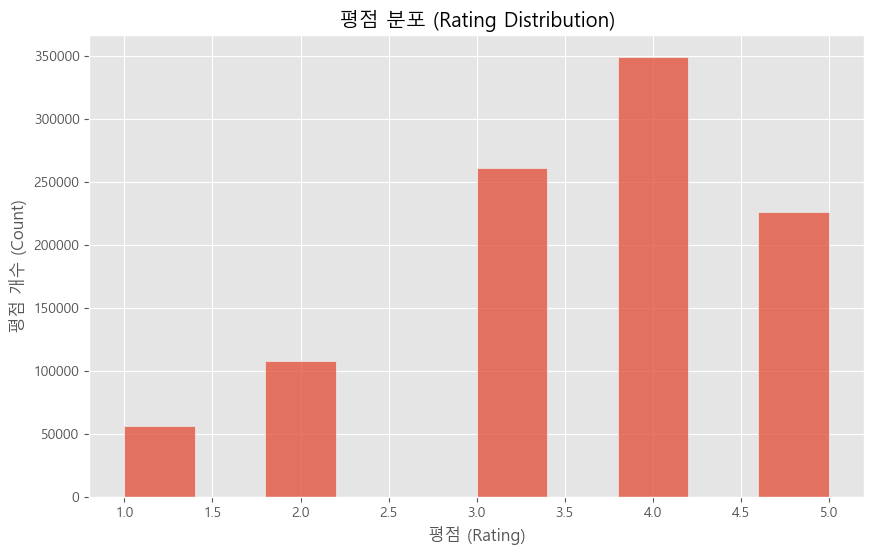

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False)
plt.title('평점 분포 (Rating Distribution)')
plt.xlabel('평점 (Rating)')
plt.ylabel('평점 개수 (Count)')
plt.show()

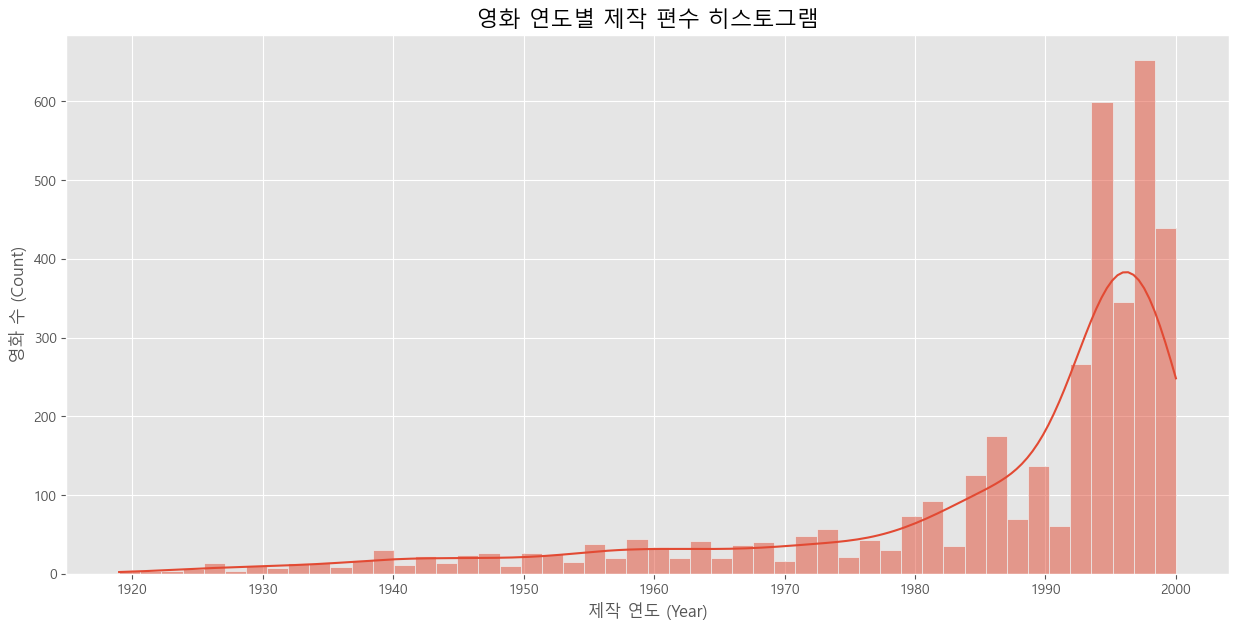

In [22]:
# 연도별 영화 분포

import seaborn as sns
import re

movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)
movies_with_year_df = movies_df.dropna(subset=['year'])
movies_with_year_df['year'] = pd.to_numeric(movies_with_year_df['year'])


plt.figure(figsize=(15, 7))
sns.histplot(data=movies_with_year_df, x='year', bins=50, kde=True)

plt.title('영화 연도별 제작 편수 히스토그램', fontsize=16)
plt.xlabel('제작 연도 (Year)', fontsize=12)
plt.ylabel('영화 수 (Count)', fontsize=12)
plt.grid(True) # 그리드 라인 추가
plt.show()

In [23]:
#processed_movie_df = pd.read_csv('../dataset/processed/movies_processed.csv')
#print(len(processed_movie_df))

In [24]:
#processed_rating_df = pd.read_csv('../dataset/processed/ratings_processed.csv')
#print(len(processed_rating_df))